## Description

Here we try to model as Bayessian linear equation with two normal parameters. Our goal is to predict the outcomes Y as normally distributed over a mean mu. Lets' call the independent variables X1 and X2. 

Mathematically, the equation at the core of our model is as follows :      

                                mu = aX1 + bX2 + c 
 
 Our dependent variable Y is defined as follows: 
 
                                Y ~ N(mu, sigma^2 )
 
 Our parameters are defined as follows:
 
                                a ~ N(0,100)
                                b ~ N(0,100)
 
                                sigma ~ | N(0,1) | 
 
We assign a half normal distribution to sigma to make always positive. 

Model Notation - for easy of understadning,  c --> alpha ; a --> beta1 ; b --> beta2 ;


The next step is to define a model prior for our parameters. We use PyMC library in python to work around priors and predicting posteriors. 
fitting the model can be done by two mwthods each suiting a different practical purpose. 

**Maximum Posteriori (MAP)**- We estimate the modeof the posteriori distribution. Thismodel iusd numerical optimizatipon methods to return a point estimate as out result, but with a few limitations. Getting a point estimate of the mode of the posteriori can leave our model prone to biase if the mode isnt representative of the distribution. The model also fails to give us an understanding of the uncertanity element in out prediction. This leaves a major blind spot which can be covered by ur next method.

**Sampling methods-**  Using a **Markov Chain Monte Carlo** method  gves us markov chain of values given satisfaction of certain conditions. Output we get is indistinguishable from the posteriori distribution. 

#### Required Libraries 

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pymc3 as pm

#### Initialize X1 and X2 with random numbers

In [2]:
np.random.seed(1368993)

size= 100

X1= np.random.randn(size)
X2= np.random.randn(size)*0.2

print("X1 = "+ str(X1[:10]))
print("X2 = "+ str(X2[:10]))



X1 = [-0.38350554 -0.20330345  1.4006178   1.22645842  0.13943626 -0.65501548
  0.41518279  0.00425347  0.36744034  0.30131119]
X2 = [ 0.20927483  0.07293123 -0.13962291  0.25240832  0.19229777 -0.1882993
  0.05866976 -0.02972943  0.17377152 -0.26083235]


#### We define base model by initialising all parameters <alpha, sigma, beta1, beta2>. We claulate the values of Y (Y= alpha + beta1*X1 + beta2*X2) from this.

In [3]:
#true parameters
true_alpha, true_sigma = 0.1, 0.1
true_beta =[0.1,0.25]

#y calculation 
noise = np.random.rand(size)*true_sigma
Y_obs = true_alpha + true_beta[0]*X1 + true_beta[1]*X2 + noise

#lets see the vaalue of our variables 
list(zip(X1[0:5],X2[0:5],Y_obs[:5]))

[(-0.383505544470448, 0.20927483436776262, 0.15535490734566265),
 (-0.20330345355537124, 0.07293122819834374, 0.13394502961342603),
 (1.400617802079121, -0.13962291193154494, 0.24627948703014324),
 (1.226458418246808, 0.25240832222832327, 0.32185877539059043),
 (0.1394362609226127, 0.19229776818566371, 0.2324090600798492)]

Text(0.5,0.98,'Scatter - Basic Varable Dependence')

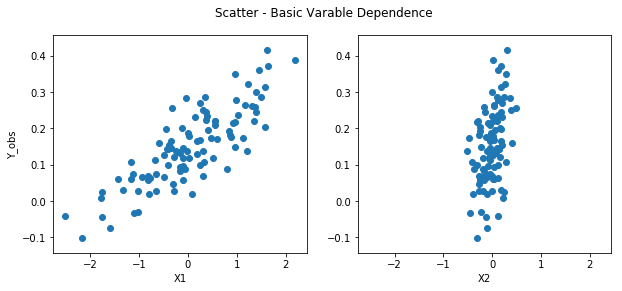

In [4]:
fig, axes= plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1,Y_obs)
axes[1].scatter(X2,Y_obs)
axes[0].set_ylabel("Y_obs"); axes[0].set_xlabel("X1"); axes[1].set_xlabel("X2"); fig.suptitle("Scatter - Basic Varable Dependence")

###Model Specification

In [0]:
#define a model 
test_model = pm.Model() #this is a model object that acts as a container for model RVs

#model elements will be defined using a with statement 
with test_model:
  
  #priors with unkown model parameters 
  alpha = pm.Normal('alpha', mu=0,sd=10)
  beta= pm.Normal('beta',mu=0,sd=10,shape=2)
  sigma = pm.HalfNormal('sigma',sd= 1)
  
  #expected value of outcome 
  mu = alpha + beta[0]*X1 + beta[1]*X2
  
  #likelihood of out estimate 
  Y=  pm.Normal('Y_obs', mu= mu, sd= sigma, observed = Y_obs)



### Using Maximum a posteriori (MAP) to estimate our posteriors 

In [8]:
map_estimate = pm.find_MAP(model = test_model)


/usr/local/lib/python2.7/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = 205.25, ||grad|| = 9.6009: 100%|██████████| 25/25 [00:00<00:00, 683.71it/s]  


### Mode point estimates 

The result gives us point estimates of our dependent variable. While this is descent first estimate we cannot comment on how definitive our parameter estimations are or compare the accuracy of the model in comparision with other moels.

In [9]:
map_estimate

{'alpha': array(0.14993324),
 'beta': array([0.09586028, 0.25042157]),
 'sigma': array(0.02814689),
 'sigma_log__': array(-3.57031843)}

### Markov Chain Monte Carlo Sampling

In [10]:
with test_model:
  
  trace= pm.sample(draws= 5000, tune= 500, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, beta, alpha]
100%|██████████| 5500/5500 [00:07<00:00, 746.89it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [11]:
trace['beta'][-5:]

array([[0.10144532, 0.25285702],
       [0.09670998, 0.24410499],
       [0.09051442, 0.25700047],
       [0.09185832, 0.25743074],
       [0.09604011, 0.26619501]])

###Posterior Analysis 

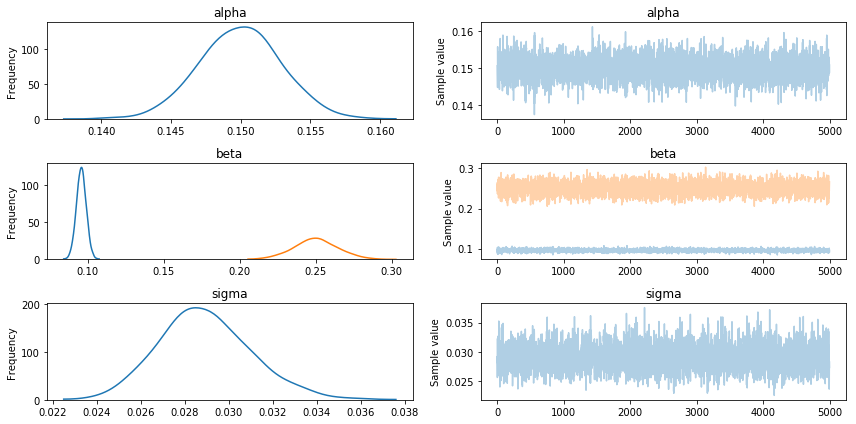

In [12]:
_ = pm.traceplot(trace)

### Results 

We see the estimated values of out parameters along with the distribution metrics which gives us a deeper understading of our model fit. 

In [13]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,0.149971,0.002914,0.000039,0.144397,0.155749
beta__0,0.095857,0.003178,0.000043,0.089529,0.102007
beta__1,0.250213,0.014288,0.000165,0.222470,0.278802
sigma,0.028936,0.002094,0.000031,0.024955,0.033125
